In [186]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [187]:
data = yf.download('BTC-USD','2015-01-01','2024-01-01')

[*********************100%%**********************]  1 of 1 completed


In [188]:
data = pd.DataFrame(data)

In [189]:
data.reset_index(inplace=True)

In [190]:
data.drop(columns = ['Date','Open','High','Low','Adj Close','Volume'], inplace=True)

In [191]:
data

,Close
0,314.248993
1,315.032013
2,281.082001
3,264.195007
4,274.473999
...,...
3282,43442.855469
3283,42627.855469
3284,42099.402344
3285,42156.902344


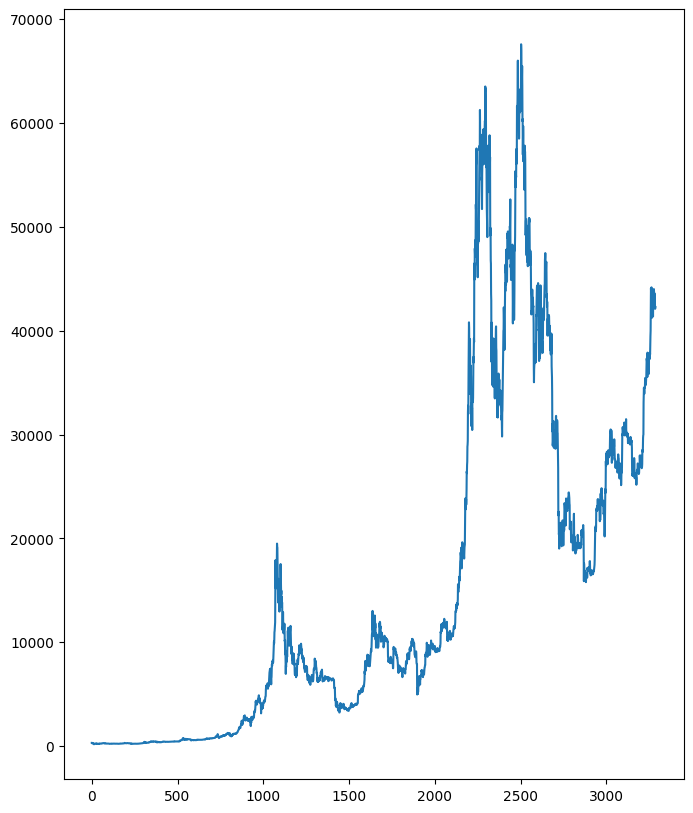

In [192]:
plt.figure(figsize=(8,10))
plt.plot(data)
plt.show()

In [193]:
train_data = data[:-100]
test_data = data[-100:]

In [194]:
train_data.shape

(3187, 1)

In [195]:
test_data.shape

(100, 1)

In [196]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [197]:
train_data_scale = scaler.fit_transform(train_data)

In [198]:
base_days = 100

In [199]:
x = []
y = []
for i in range(base_days, train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])

In [200]:
x, y = np.array(x), np.array(y)

In [201]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [202]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

In [203]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\vijay A\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [204]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [205]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [206]:
model.fit(x, y, epochs = 50, verbose =1 )

Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - loss: 0.0287
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - loss: 0.0054
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - loss: 0.0058
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - loss: 0.0047
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - loss: 0.0040
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - loss: 0.0040
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - loss: 0.0034
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - loss: 0.0037
Epoch 9/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 0.0037
Epoch 10/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - loss: 0.0032
Epoch 11/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - loss: 0.0032
Epoch 12/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 0.0030
Epoch 13/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - loss: 0.0035
Epoch 14/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - loss: 0.0034
Epoch 15/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - loss: 0.0028
Epo

In [209]:
test_data = pd.concat((train_data.tail(100), test_data), ignore_index=True)

In [208]:
test_data

,Close
0,25576.394531
1,26327.462891
2,26510.675781
3,26336.212891
4,26851.029297
...,...
195,43442.855469
196,42627.855469
197,42099.402344
198,42156.902344


In [210]:
test_data_scale = scaler.transform(test_data)

In [211]:
x = []
y = [] 

for i in range(base_days, test_data_scale.shape[0]):
    x.append(test_data_scale[i-base_days:i])
    y.append(test_data_scale[i,0])

In [212]:
x, y = np.array(x), np.array(y)

In [213]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [214]:
pred = model.predict(x)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


In [215]:
pred = scaler.inverse_transform(pred)

In [216]:
pred

array([[26598.049],
       [26449.623],
       [26222.912],
       [26008.672],
       [25853.88 ],
       [25811.86 ],
       [25985.408],
       [26503.898],
       [27323.46 ],
       [28326.486],
       [29301.816],
       [30045.955],
       [30440.047],
       [30552.447],
       [30435.156],
       [30211.566],
       [29983.705],
       [29811.697],
       [29722.025],
       [29756.268],
       [29872.969],
       [29993.701],
       [30025.896],
       [29983.584],
       [29906.5  ],
       [29820.607],
       [29761.643],
       [29760.959],
       [29801.922],
       [29954.623],
       [30113.078],
       [30198.031],
       [30185.129],
       [30090.268],
       [29928.896],
       [29742.555],
       [29563.01 ],
       [29422.691],
       [29328.102],
       [29299.527],
       [29268.824],
       [29196.604],
       [29100.299],
       [28995.842],
       [28910.568],
       [28862.781],
       [28847.518],
       [28850.201],
       [28893.549],
       [28937.824],


In [217]:
#future Bitcoin Price

In [218]:
m = y
z= []
future_days = 30
for i in range(base_days, len(m)+future_days):
    m = m.reshape(-1,1)
    inter = [m[-base_days:,0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1],1))
    pred = model.predict(inter)
    m = np.append(m ,pred)
    z = np.append(z, pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━

In [219]:
z = np.array(z)
z = scaler.inverse_transform(z.reshape(-1,1))

In [220]:
z

array([[40151.4618367 ],
       [39819.03729855],
       [39308.10743904],
       [38675.91799613],
       [38003.88709415],
       [37346.91874601],
       [36731.83634757],
       [36167.23961292],
       [35653.42979312],
       [35187.47872771],
       [34765.65492003],
       [34383.51993753],
       [34036.37024674],
       [33719.38984712],
       [33427.7868382 ],
       [33156.96212022],
       [32902.71424482],
       [32661.98651774],
       [32432.30064679],
       [32211.98167599],
       [31999.45908306],
       [31793.48368019],
       [31593.87873343],
       [31400.4474254 ],
       [31212.92867183],
       [31031.07343851],
       [30854.73712492],
       [30683.83136406],
       [30518.29992242],
       [30358.07451641],
       [30203.054729  ],
       [30053.11604309],
       [29908.0817247 ],
       [29767.76700652],
       [29631.95097109],
       [29500.4006509 ],
       [29371.69815756],
       [29245.17672201],
       [29120.47885964],
       [28997.36758629],


In [221]:
model.save('Bitcoin_Price_prediction_Model.keras')